# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('/home/plotvichka_2/oiad-3-2025/datasets/teen_phone_addiction_dataset.csv')

In [12]:
# Хархалёв Алексей - № 14 в группе БМИ
N = 14
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col_name = cols[N % 7]
print(f'My col: {col_name}')

My col: Daily_Usage_Hours


In [13]:
data = df[col_name]
data.head()

0    4.0
1    5.5
2    5.8
3    3.1
4    2.5
Name: Daily_Usage_Hours, dtype: float64

## I.

In [14]:
def describe(data):
    mean = data.mean()
    var = data.var()
    mode = data.mode()[0]
    median = data.median()
    quantiles = data.quantile([0.25, 0.5, 0.75])
    kurtosis = data.kurtosis()
    skewness = data.skew()
    iqr = quantiles[0.75] - quantiles[0.25]

    print(f"Среднее: {mean:.2f}")
    print(f"Дисперсия: {var:.2f}")
    print(f"Мода: {mode:.2f}")
    print(f"Медиана: {median:.2f}")
    print("Квантили:")
    print(f"  0.25: {quantiles[0.25]:.2f}")
    print(f"  0.50: {quantiles[0.50]:.2f}")
    print(f"  0.75: {quantiles[0.75]:.2f}")
    print(f"Эксцесс: {kurtosis:.2f}")
    print(f"Асимметрия: {skewness:.2f}")
    print(f"Интерквартильный размах (IQR): {iqr:.2f}")    

In [15]:
describe(data)

Среднее: 5.02
Дисперсия: 3.83
Мода: 4.40
Медиана: 5.00
Квантили:
  0.25: 3.70
  0.50: 5.00
  0.75: 6.40
Эксцесс: -0.12
Асимметрия: 0.02
Интерквартильный размах (IQR): 2.70


In [34]:
def hist(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True)
    plt.title('Гистограмма для Daily_Usage_Hours with kde')
    plt.xlabel('Часы использования')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()    

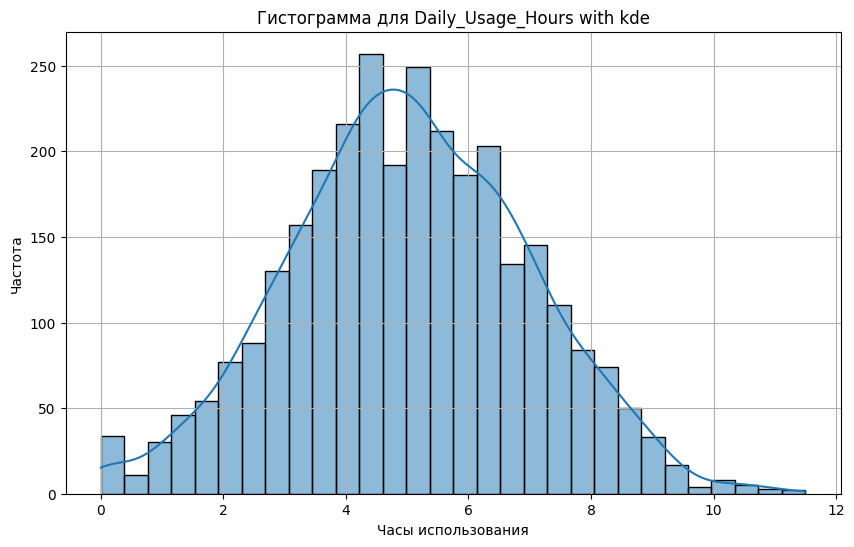

In [35]:
hist(data)

In [89]:
def ecdf(data):
    sns.ecdfplot(data=pd.DataFrame(data, columns=[col_name]), x=col_name)

    plt.title('Empirical Cumulative Distribution Function (ECDF)')
    plt.xlabel('Value')
    plt.ylabel('Proportion')

    plt.show()

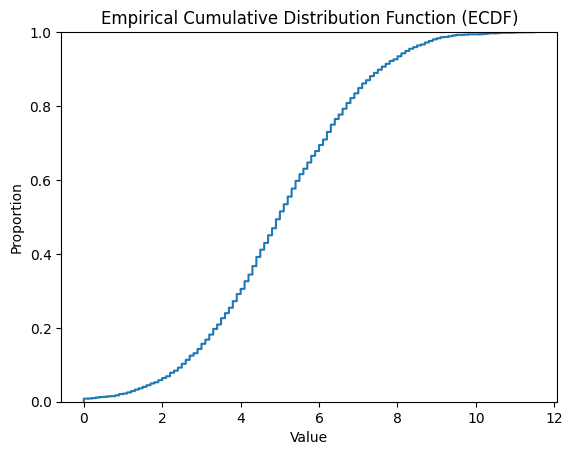

In [90]:
ecdf(data)

Исходные данные (`Daily_Usage_Hours`) демонстрируют характеристики, очень близкие к нормальному распределению. **Среднее значение (5.02)** и **медиана (5.00)** практически совпадают, что указывает на симметрию распределения. **Коэффициенты асимметрии (0.02)** и **эксцесса (-0.12)** также близки к нулю, подтверждая отсутствие скошенности и "тяжелых хвостов". Визуальный анализ подтверждает это: гистограмма имеет колоколообразную форму.

## II.

In [23]:
def chi_square_normality_test(data, num_bins=10):
    observed_freq, bin_edges = np.histogram(data, bins=num_bins)
    
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    total_count = len(data)
    
    expected_freq = []
    for i in range(num_bins):
        cdf_lower = stats.norm.cdf(bin_edges[i], loc=mean, scale=std)
        cdf_upper = stats.norm.cdf(bin_edges[i+1], loc=mean, scale=std)
        expected_prob = cdf_upper - cdf_lower
        expected_freq.append(expected_prob * total_count)
        
    expected_freq = np.array(expected_freq)

    valid_indices = expected_freq >= 5
    chi_sq_stat = np.sum((observed_freq[valid_indices] - expected_freq[valid_indices])**2 / expected_freq[valid_indices])
    
    dof = np.sum(valid_indices) - 1 - 2
    p_value = 1 - stats.chi2.cdf(chi_sq_stat, dof)
    
    return chi_sq_stat, p_value

In [91]:
chi_sq, p_val = chi_square_normality_test(data)
print(f"Статистика Хи-квадрат: {chi_sq:.2f}")
print(f"p-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Нулевая гипотеза отвергается: данные не распределены нормально.")
else:
    print("Нулевая гипотеза не отвергается: данные могут быть распределены нормально.")

Статистика Хи-квадрат: 16.62
p-value: 0.0200
Нулевая гипотеза отвергается: данные не распределены нормально.


In [92]:
def qq_plot(data):
    plt.figure(figsize=(8, 8))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot для Daily_Usage_Hours')
    plt.grid(True)
    plt.show()

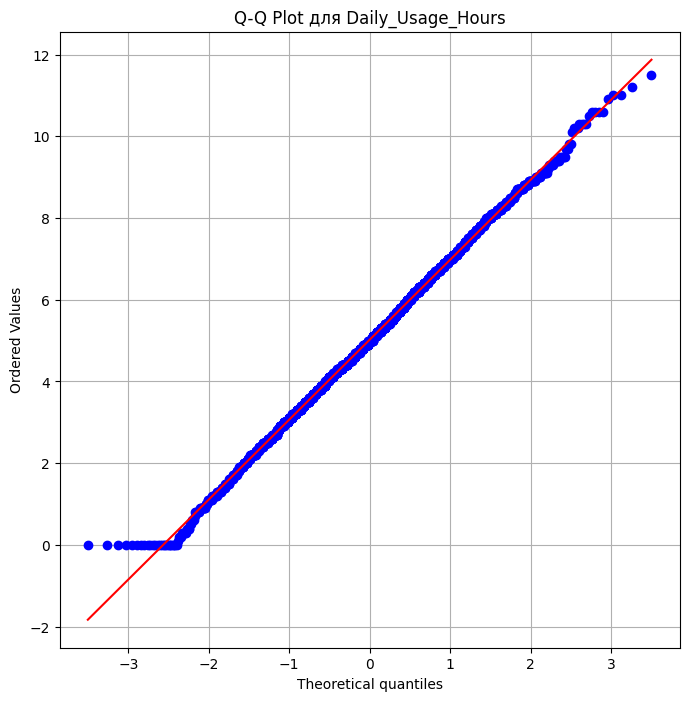

In [26]:
qq_plot(data)

Несмотря на сильное визуальное сходство с нормальным распределением, формальный **тест Хи-квадрат отвергает нулевую гипотезу о нормальности** (полученное p-value = 0.02 < 0.05). Также это подтверждает q-q plot, где отклонение от идеальной линии говорит о том, что левый хвост более "низкий". Таким образом, с формальной статистической точки зрения, данные **не являются** нормально распределенными.

## III.

## Outlilers deletion

In [44]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

In [45]:
describe(data_no_outliers)

Среднее: 5.00
Дисперсия: 3.73
Мода: 4.40
Медиана: 5.00
Квантили:
  0.25: 3.70
  0.50: 5.00
  0.75: 6.30
Эксцесс: -0.24
Асимметрия: -0.05
Интерквартильный размах (IQR): 2.60


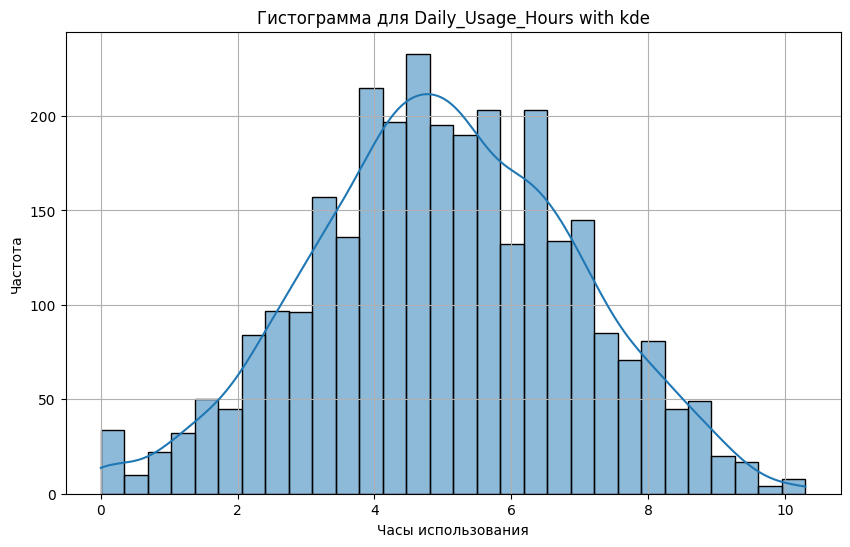

In [46]:
hist(data_no_outliers)

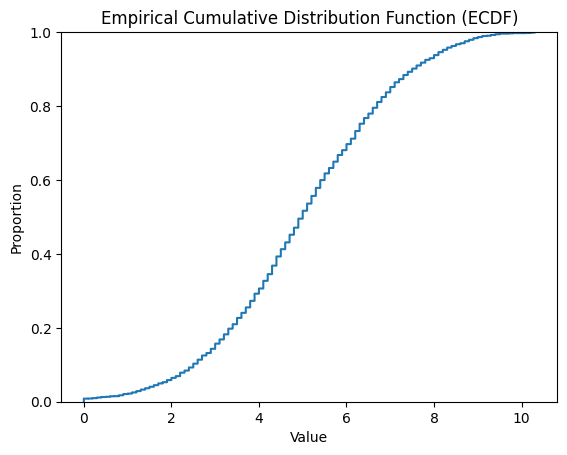

In [47]:
ecdf(data_no_outliers)

In [56]:
chi_sq, p_val = chi_square_normality_test(data_no_outliers)
print(f"Статистика Хи-квадрат: {chi_sq:.2f}")
print(f"p-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Нулевая гипотеза отвергается: данные не распределены нормально.")
else:
    print("Нулевая гипотеза не отвергается: данные могут быть распределены нормально.")

Статистика Хи-квадрат: 27.73
p-value: 0.0002
Нулевая гипотеза отвергается: данные не распределены нормально.


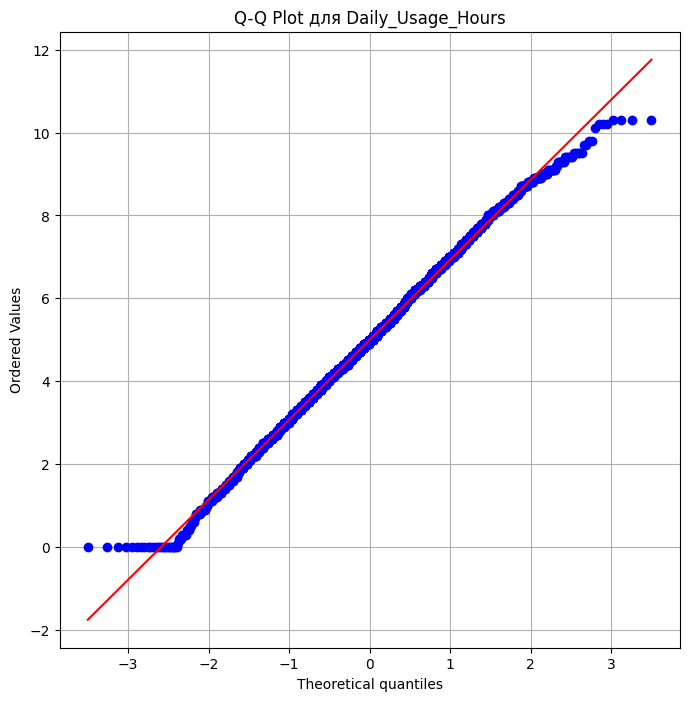

In [57]:
qq_plot(data_no_outliers)

## Logarithmic transform

In [58]:
data_log = np.log1p(data)

In [59]:
describe(data_log)

Среднее: 1.73
Дисперсия: 0.15
Мода: 1.69
Медиана: 1.79
Квантили:
  0.25: 1.55
  0.50: 1.79
  0.75: 2.00
Эксцесс: 3.32
Асимметрия: -1.39
Интерквартильный размах (IQR): 0.45


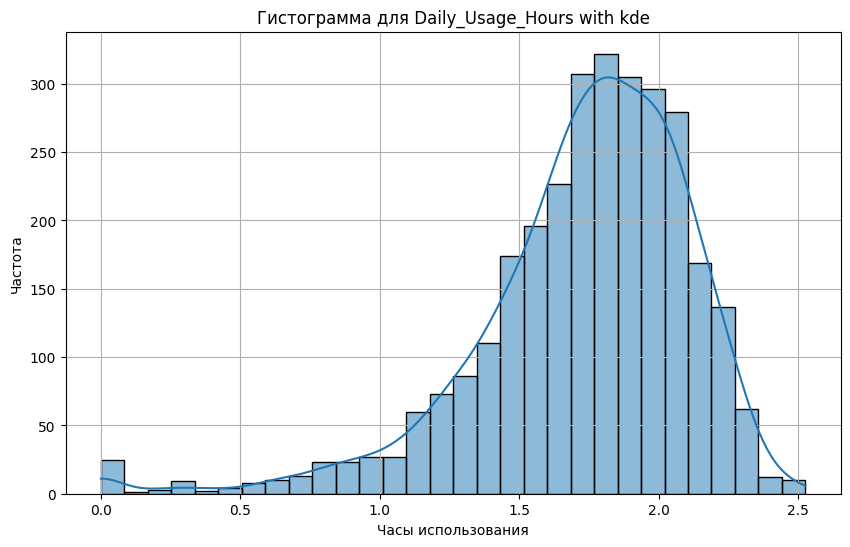

In [60]:
hist(data_log)

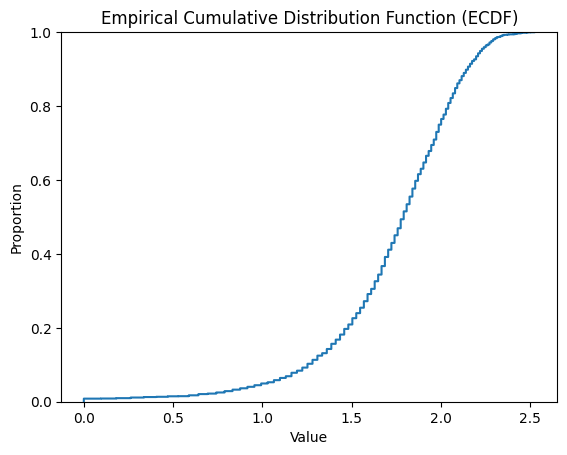

In [61]:
ecdf(data_log)

In [62]:
chi_sq, p_val = chi_square_normality_test(data_log)
print(f"Статистика Хи-квадрат: {chi_sq:.2f}")
print(f"p-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Нулевая гипотеза отвергается: данные не распределены нормально.")
else:
    print("Нулевая гипотеза не отвергается: данные могут быть распределены нормально.")

Статистика Хи-квадрат: 265.03
p-value: 0.0000
Нулевая гипотеза отвергается: данные не распределены нормально.


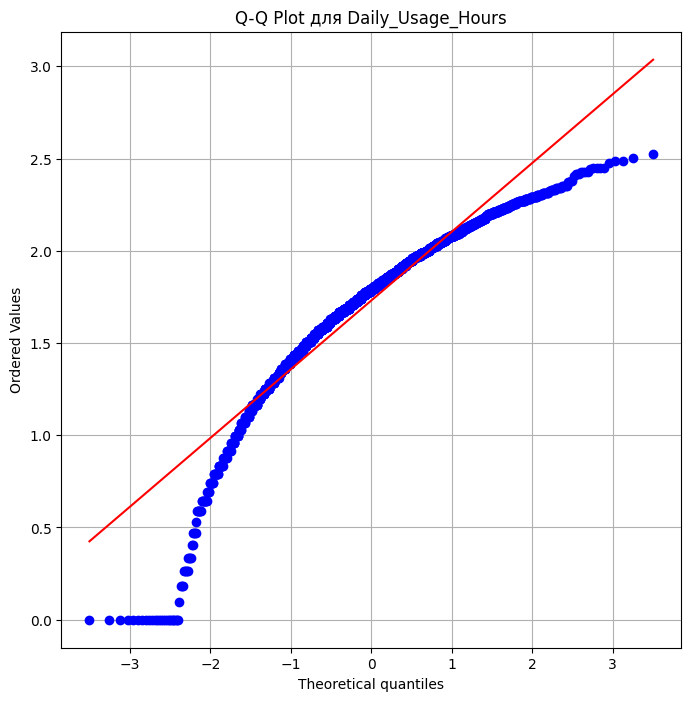

In [65]:
qq_plot(data_log)

## Scaler

In [83]:
scaler = StandardScaler()

data_scaled = pd.Series(scaler.fit_transform(pd.DataFrame(data)).reshape(-1))

In [84]:
describe(data_scaled)

Среднее: -0.00
Дисперсия: 1.00
Мода: -0.32
Медиана: -0.01
Квантили:
  0.25: -0.68
  0.50: -0.01
  0.75: 0.71
Эксцесс: -0.12
Асимметрия: 0.02
Интерквартильный размах (IQR): 1.38


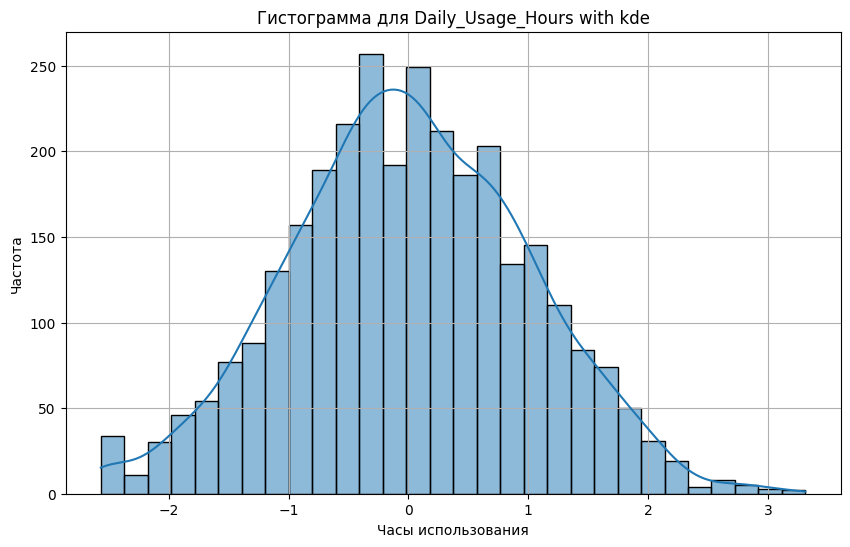

In [93]:
hist(data_scaled)

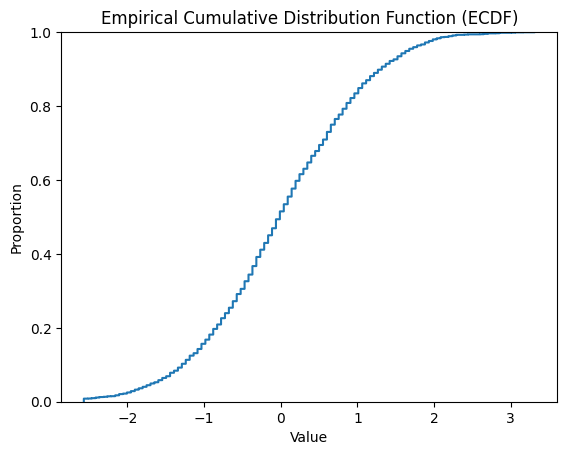

In [95]:
ecdf(data_scaled)

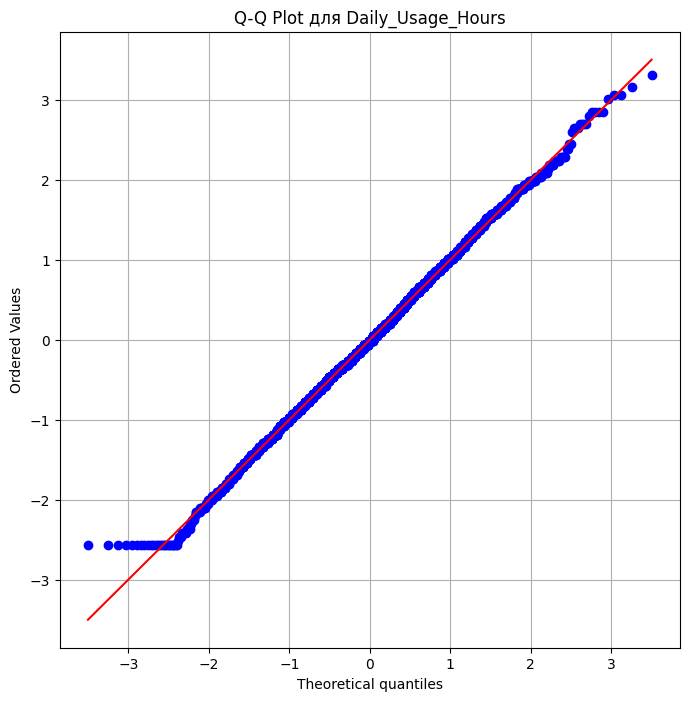

In [97]:
qq_plot(data_scaled)

Примененные техники обработки данных **не привели** к нормальному распределению. Более того, после удаления выбросов тест Хи-квадрат показал еще более значимое отклонение от нормальности (p-value снизилось до 0.0002), что усилило уверенность в отвержении нулевой гипотезы. Логарифмическое преобразование было неподходящим, так как оно внесло сильную отрицательную асимметрию в изначально симметричные данные. Стандартизация, как и ожидалось, изменила лишь масштаб, но не форму распределения. Наиболее близкими к нормальному были **исходные, необработанные данные**.

## IV.

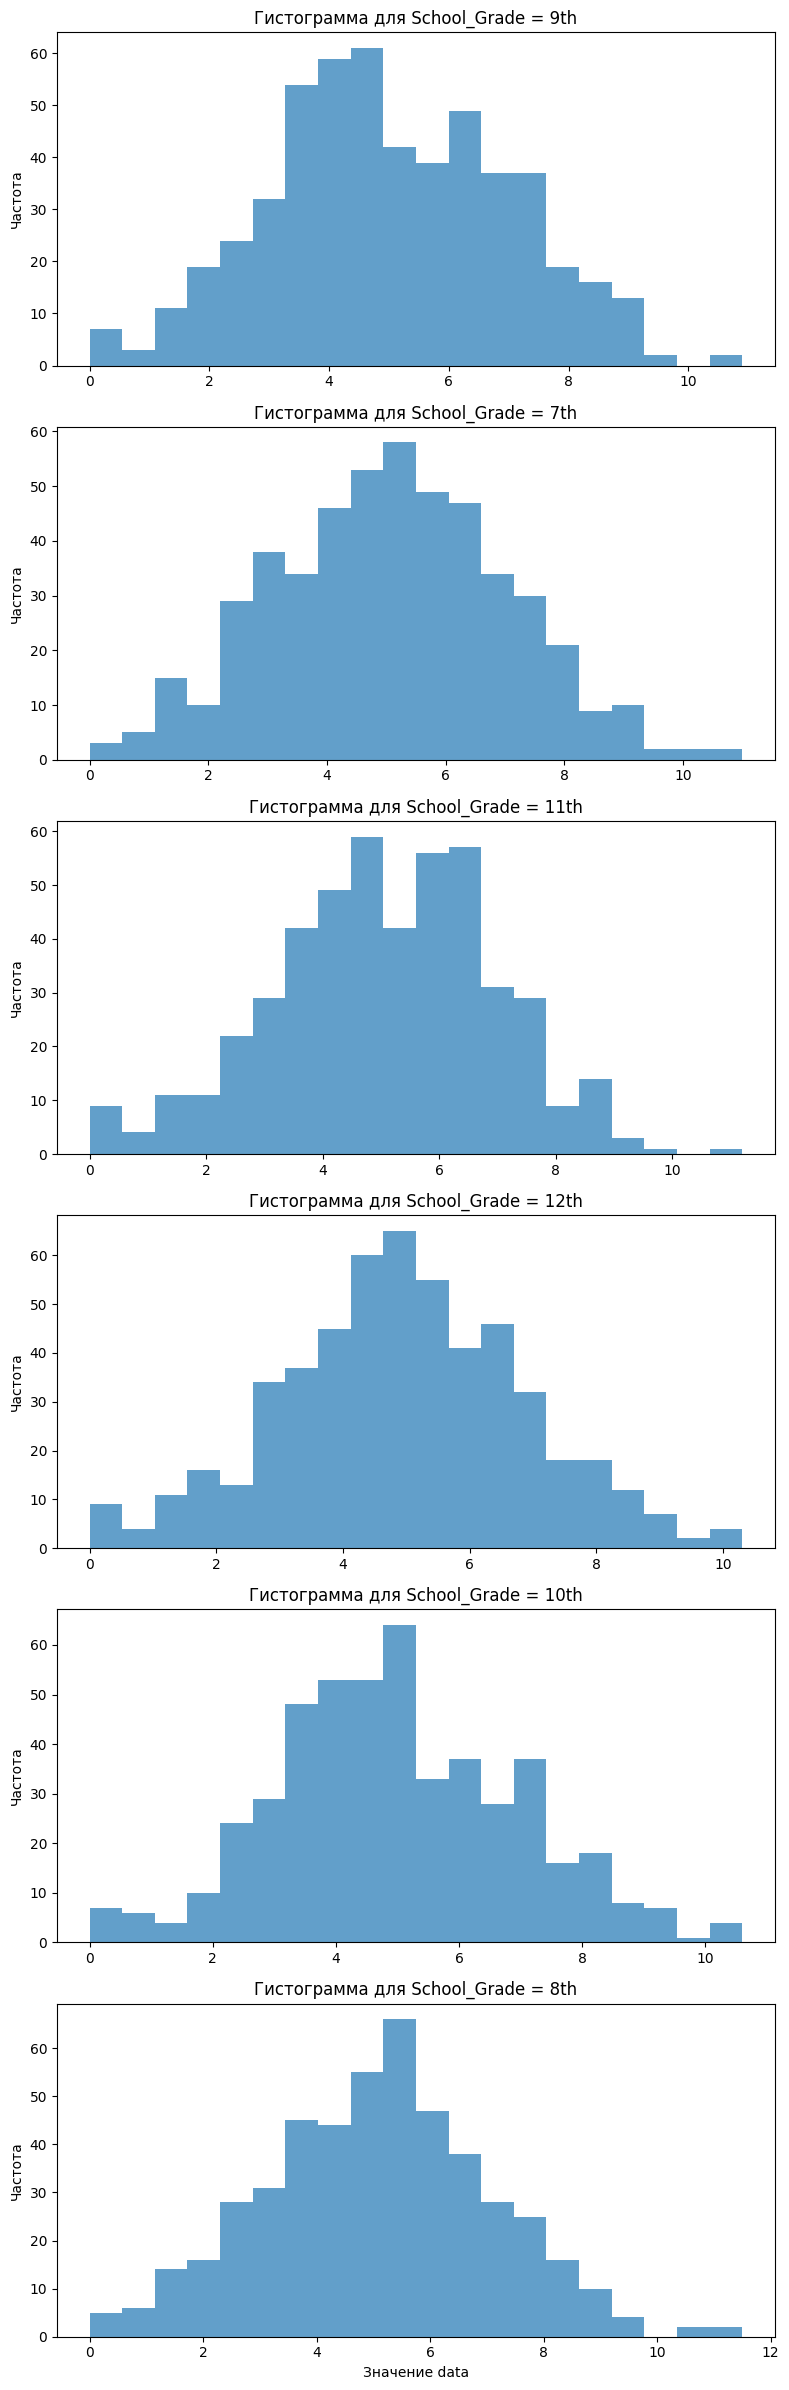

In [107]:
groups = df['School_Grade'].unique()
num_groups = len(groups)

fig, axes = plt.subplots(num_groups, 1, figsize=(8, 4*num_groups))

for ax, group in zip(axes, groups):
    subset = df[df['School_Grade'] == group][col_name]
    ax.hist(subset, bins=20, alpha=0.7)
    ax.set_title(f'Гистограмма для School_Grade = {group}')
    ax.set_ylabel('Частота')

axes[-1].set_xlabel('Значение data')

plt.tight_layout()
plt.show()

In [108]:
group_stats = df.groupby('School_Grade')['data'].agg(['mean', 'var'])
print(group_stats)

                  mean       var
School_Grade                    
10th          4.977618  3.812605
11th          5.061795  3.635211
12th          4.936862  3.735589
7th           5.077062  3.883344
8th           5.066390  4.009513
9th           5.012167  3.912652


Анализ в разрезе групп по `School_Grade` **не выявил существенных различий** в распределении времени использования телефона. Средние значения для всех классов (с 7-го по 12-й) очень близки и находятся в диапазоне от 4.94 до 5.08 часов. Дисперсии также сопоставимы. Гистограммы для каждой группы демонстрируют схожую колоколообразную форму и центральное положение. Можно сделать вывод, что привычки ежедневного использования телефона в часах достаточно однородны среди учащихся разных классов.